In [1]:
import re
import requests
import datetime
import time
from time import time

In [2]:
def gettext(pid):
    ua = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36'
    url = 'https://www.amazon.com/dp/'+pid
    s = requests.get(url, headers={'User-Agent':ua})
    return s

In [3]:
def getprice(s):
    pattern = '<span id="priceblock_ourprice" class="a-size-medium a-color-price">$'
    price = float(s.text.split(pattern)[-1].split('</span>')[0] )
    return int(price)

In [4]:
def getrevcnt(s):
    rc = re.findall('a-icon a-icon-star-.+\n.+\n', s.text)
    if rc != []:
        lrc = len(rc[0])
        if lrc>150:
            rcnt = re.findall('totalReviewCount">.+?</span', s.text)[0].split('>')[1].split('<')[0]
        else:
            rcnt = (rc[0].split('\n')[1].strip().split(' ')[0])
    else:
        print('rc={}'.format(len(rc)))
        lrc = len(rc)
        rcnt = rc
    return rcnt, lrc

In [5]:
def getinv(s):
    rc = re.findall('[\n]+.+Used & new</b> .+ from', s.text)
    if rc == []:
        rc = re.findall('[\n]+.+New</b> .+ from', s.text)
    if rc == []:
        rc = re.findall('[\n]+.+Used</b> .+ from', s.text)

    if rc != []:
        rc = rc[0].split('(')[1].split(')')[0]
    else:
        rc = ['NULL']
    return rc

In [6]:
def getrate(s, lrc):
    sr = []
    for i in range(1, 6):
        if lrc > 150:
            tmp = re.findall(str(i) +'star" aria-label=".+?%', s.text)
            if tmp != []:
                sr.append(tmp[0].split('="')[1].split('%')[0])
            else:
                sr.append(0)            
        else:
            tmp = re.findall(str(i) +' stars represent .+? of rating', s.text)
            if tmp != []:
                sr.append(tmp[0].split(str(i) +' stars represent ')[1].split('%')[0])
            else:
                sr.append(0)
    return sr

In [7]:
def logread():
    fn = "DailyCollection/items.txt"
    tar = open(fn, 'r')
    items = tar.read()
    tar.close()
    return items

#, ID, Name, Date-Time, price, rc size, inventory, review count, ratings

In [142]:
log[1]

['1',
 'B01FJLA8NI',
 'Intel Boxed Core i7-6800K Processor (15M Cache up to 3.60 GHz) FC-LGA14A 3.4 6',
 '2017-03-02 09:01:09.062488']

'\n\n\n  \n  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n    <!doctype html><html class="a-no-js" data-19ax5a9jf="dingo">\n    <head>\n<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>\n<script type="text/javascript">\nvar ue_hob=+new Date();\nvar ue_id=\'QD7YWBJTS9NAPG34ZFQC\',\nue_csm = window,\nue_err_chan = \'jserr-rw\',\nue = {};\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a[2])};b[a].isStub=1}};e.exec=function(b,a){return function(){if(1==window.ueinit)try{return b.apply(this,arguments)}catch(c){ueLogError(c,{attribution:a||"undefined",logLevel:"WARN"})}}}})(ue_csm);\n\nue.stub(ue,"log");ue.stub(ue,"onunload");ue.stub(ue,"onflush");\n\n(function(c,d)
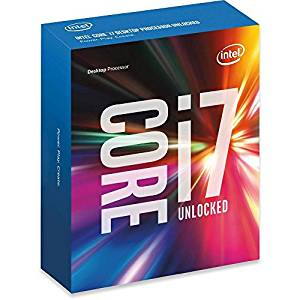

In [144]:
s.text

In [15]:
log = []
items = logread().split('\n')
for i in range(0, 16):
    log.append(items[i].split(','))
   
    log[i].append(str(datetime.datetime.now()))
    print(log[i][1])
    
    s = gettext(log[i][1])
    log[i].append(getprice(s))
    rvcnt, lrc = getrevcnt(s)
    log[i].append(lrc)
    log[i].append(getinv(s))
    log[i].append(rvcnt)
    log[i].append(getrate(s, lrc))
    #print(log[i])
    
logwrite(log)

B01MXSI216
B01FJLA8NI
B012M8LXQW
B0136JONG8
B01N0L41N7
B01FJLAITC
B01798X7D2
B01BPEZ5P4
B01CIEBI88
rc=0
B00CPLGGWS
B00Y1AJLS2
B01BF377W4
B01CO2JDLI
B01BPF2L0U
B06W9JXK4G
B06X3W9NGG


In [8]:
def logwrite(lst):
    fn = "DailyCollection/DailyCollection.txt"
    tar = open(fn, 'a')
    r = len(lst)
    j = len(lst[0])-1
    #print('r={} j={}'.format(r, j))
    
    for q in range(r):
        for i in range(j):
            if i == 2: tar.write("'")
            tar.write('{}'.format(lst[q][i]))
            if i == 2: tar.write("'")
            tar.write(',')
        for i in range(5):
            #print('q={} i={}'.format(q, i))
            tar.write('{}'.format(lst[q][j][i]))
            if i < 4:
                tar.write(',')
        tar.write('\n')
    tar.close()